---

# A cryptographic protocol to train classification models with federated learning and homomorphic encryption

---

## Imports

In [1]:
import os
import pickle as pkl

from sklearn.datasets import load_digits

from simulation.simulation import Simulation

---

## Pickle Functions and Simulation Execution Path

In [2]:
def pickle_save(data, path, filename):
    with open(os.path.join(path, filename), 'wb') as file:
        pkl.dump(data, file)
        return True
    return False

def pickle_load(path, filename):
    with open(os.path.join(path, filename), 'rb') as file:
        data = pkl.load(file)
        return data
    return None

In [3]:
SAVE_DIR = os.path.join(os.path.abspath(os.pardir), 'executions')

---

## Load Data

This notebook involves learning using images data from multiple clients to predict digits. The data is a standard dataset from sklearn [1].

[1] https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [2]:
dataset = load_digits()

X, y = dataset.data, dataset.target

---

## Scenario 1

This scenario uses a MLP Neural Network for classification with the following structure and information:
- 64 features.
- 10 classes.
- No hidden layers.
- Weights and biases initializated in zeros.
- Softmax as output layer.

The protocol runs over 5 clients and the key length of homomorphic cryptosystem is 1024 bits.

The train is executed using 90% of data equally distributed over the 5 clients, with 0.01 as learning rate and 120 epochs.

The test is executed using the remaining 10% of data for all clients.

### Hyperparameters

In [22]:
HYPERPARAMS_1 = {
    'n_clients': 5,
    'key_length': 1024,
    'architecture': {
        'n_features': 64, 
        'n_classes': 10,
        'hidden_layers_size': (),
        'activations': (),
        'initialization': 'zeros'
    },
    'train': {
        'learning_rate': 0.01,
        'epochs': 120
    },
    'test': {
        'test_size': 0.1
    }
}

### Simulation Initialization

In [23]:
simulation_1 = Simulation(X, y, **HYPERPARAMS_1)
print(simulation_1)
simulation_1.print_metadata()

Simulación para 5 clientes

        Layers size: (64, 10)
        Activations: ('softmax',)
        Trainable parameters: 650
        


### Run on Local Data

In [24]:
simulation_1.run_local()

Running local training for 120 epochs...

Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.916667 | 1.05915 |    0.926553 | 0.916667 |  0.993473 |
|  1 | Client 2 |   0.872222 | 1.03494 |    0.887286 | 0.872222 |  0.992943 |
|  2 | Client 3 |   0.883333 | 1.07236 |    0.914019 | 0.883333 |  0.992837 |
|  3 | Client 4 |   0.9      | 1.05519 |    0.904683 | 0.9      |  0.992879 |
|  4 | Client 5 |   0.9      | 1.04635 |    0.91044  | 0.9      |  0.993189 |


### Run the Federated Protocol

In [25]:
simulation_1.run_federated()


Running distributed gradient aggregation for 120 epochs...

- Epoch 001 / 120 : Epoch Time: 63.64s, Total Time: 63.64s
- Epoch 002 / 120 : Epoch Time: 60.03s, Total Time: 123.68s
- Epoch 003 / 120 : Epoch Time: 58.71s, Total Time: 182.39s
- Epoch 004 / 120 : Epoch Time: 59.02s, Total Time: 241.41s
- Epoch 005 / 120 : Epoch Time: 58.81s, Total Time: 300.21s
- Epoch 006 / 120 : Epoch Time: 59.02s, Total Time: 359.23s
- Epoch 007 / 120 : Epoch Time: 58.93s, Total Time: 418.16s
- Epoch 008 / 120 : Epoch Time: 60.87s, Total Time: 479.03s
- Epoch 009 / 120 : Epoch Time: 47.59s, Total Time: 526.62s
- Epoch 010 / 120 : Epoch Time: 44.71s, Total Time: 571.33s
- Epoch 011 / 120 : Epoch Time: 46.21s, Total Time: 617.54s
- Epoch 012 / 120 : Epoch Time: 46.16s, Total Time: 663.70s
- Epoch 013 / 120 : Epoch Time: 46.21s, Total Time: 709.92s
- Epoch 014 / 120 : Epoch Time: 46.30s, Total Time: 756.22s
- Epoch 015 / 120 : Epoch Time: 46.26s, Total Time: 802.47s
- Epoch 016 / 120 : Epoch Time: 46.22s, 

### Save the Simulation

In [32]:
pickle_save(simulation_1, SAVE_DIR, 'simulation_scenario_1.pkl')

True

---

## Scenario 2

This scenario uses a MLP Neural Network for classification with the following structure and information:
- 64 features.
- 10 classes.
- 1 hidden layer with 16 neurons and tanh as activation function.
- Weights and biases initializated with He initialization method.
- Softmax as output layer.

The protocol runs over 4 clients and the key length of homomorphic cryptosystem is 1024 bits.

The train is executed using 90% of data equally distributed over the 4 clients, with 0.01 as learning rate and 120 epochs.

The test is executed using the remaining 10% of data for all clients.

### Hyperparameters

In [38]:
HYPERPARAMS_2 = {
    'n_clients': 4,
    'key_length': 1024,
    'architecture': {
        'n_features': 64, 
        'n_classes': 10,
        'hidden_layers_size': (16,),
        'activations': ('tanh',),
        'initialization': 'he'
    },
    'train': {
        'learning_rate': 0.01,
        'epochs': 120
    },
    'test': {
        'test_size': 0.1
    }
}

### Simulation Initialization

In [39]:
simulation_2 = Simulation(X, y, **HYPERPARAMS_2)
print(simulation_2)
simulation_2.print_metadata()

Simulación para 4 clientes

        Layers size: (64, 16, 10)
        Activations: ('tanh', 'softmax')
        Trainable parameters: 1210
        


### Run on Local Data

In [40]:
simulation_2.run_local()

Running local training for 120 epochs...

Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.516667 | 1.75114 |    0.503238 | 0.516667 |  0.86119  |
|  1 | Client 2 |   0.494444 | 1.70076 |    0.485757 | 0.494444 |  0.885155 |
|  2 | Client 3 |   0.655556 | 1.55343 |    0.674714 | 0.655556 |  0.935602 |
|  3 | Client 4 |   0.516667 | 1.6077  |    0.492679 | 0.516667 |  0.914554 |


### Run the Federated Protocol

In [41]:
simulation_2.run_federated()


Running distributed gradient aggregation for 120 epochs...

- Epoch 001 / 120 : Epoch Time: 74.49s, Total Time: 74.49s
- Epoch 002 / 120 : Epoch Time: 73.54s, Total Time: 148.03s
- Epoch 003 / 120 : Epoch Time: 71.59s, Total Time: 219.62s
- Epoch 004 / 120 : Epoch Time: 74.06s, Total Time: 293.68s
- Epoch 005 / 120 : Epoch Time: 77.11s, Total Time: 370.79s
- Epoch 006 / 120 : Epoch Time: 77.47s, Total Time: 448.26s
- Epoch 007 / 120 : Epoch Time: 75.34s, Total Time: 523.60s
- Epoch 008 / 120 : Epoch Time: 76.19s, Total Time: 599.80s
- Epoch 009 / 120 : Epoch Time: 75.66s, Total Time: 675.46s
- Epoch 010 / 120 : Epoch Time: 76.32s, Total Time: 751.78s
- Epoch 011 / 120 : Epoch Time: 79.62s, Total Time: 831.40s
- Epoch 012 / 120 : Epoch Time: 76.60s, Total Time: 908.01s
- Epoch 013 / 120 : Epoch Time: 76.28s, Total Time: 984.29s
- Epoch 014 / 120 : Epoch Time: 79.32s, Total Time: 1063.60s
- Epoch 015 / 120 : Epoch Time: 71.78s, Total Time: 1135.38s
- Epoch 016 / 120 : Epoch Time: 71.75s

### Save the Simulation

In [42]:
pickle_save(simulation_2, SAVE_DIR, 'simulation_scenario_2.pkl')

True

---

## Scenario 3

This scenario uses a MLP Neural Network for classification with the following structure and information:
- 64 features.
- 10 classes.
- 2 hidden layers with 32 and 16 neurons respectively and tanh as activation function.
- Weights and biases initializated with He initialization method.
- Softmax as output layer.

The protocol runs over 3 clients and the key length of homomorphic cryptosystem is 1024 bits.

The train is executed using 90% of data equally distributed over the 3 clients, with 0.01 as learning rate and 120 epochs.

The test is executed using the remaining 10% of data for all clients.

### Hyperparameters

In [47]:
HYPERPARAMS_3 = {
    'n_clients': 3,
    'key_length': 1024,
    'architecture': {
        'n_features': 64, 
        'n_classes': 10,
        'hidden_layers_size': (32,16),
        'activations': ('tanh','tanh'),
        'initialization': 'he'
    },
    'train': {
        'learning_rate': 0.01,
        'epochs': 120
    },
    'test': {
        'test_size': 0.1
    }
}

### Simulation Initialization

In [48]:
simulation_3 = Simulation(X, y, **HYPERPARAMS_3)
print(simulation_3)
simulation_3.print_metadata()

Simulación para 3 clientes

        Layers size: (64, 32, 16, 10)
        Activations: ('tanh', 'tanh', 'softmax')
        Trainable parameters: 2778
        


### Run on Local Data

In [49]:
simulation_3.run_local()

Running local training for 120 epochs...

Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.494444 | 1.65769 |    0.495888 | 0.494444 |  0.896748 |
|  1 | Client 2 |   0.588889 | 1.7016  |    0.650985 | 0.588889 |  0.886472 |
|  2 | Client 3 |   0.538889 | 1.70539 |    0.520901 | 0.538889 |  0.86582  |


### Run the Federated Protocol

In [50]:
simulation_3.run_federated()


Running distributed gradient aggregation for 120 epochs...

- Epoch 001 / 120 : Epoch Time: 125.95s, Total Time: 125.95s
- Epoch 002 / 120 : Epoch Time: 126.61s, Total Time: 252.56s
- Epoch 003 / 120 : Epoch Time: 127.00s, Total Time: 379.55s
- Epoch 004 / 120 : Epoch Time: 126.94s, Total Time: 506.49s
- Epoch 005 / 120 : Epoch Time: 126.91s, Total Time: 633.40s
- Epoch 006 / 120 : Epoch Time: 128.13s, Total Time: 761.54s
- Epoch 007 / 120 : Epoch Time: 132.93s, Total Time: 894.47s
- Epoch 008 / 120 : Epoch Time: 127.32s, Total Time: 1021.79s
- Epoch 009 / 120 : Epoch Time: 126.91s, Total Time: 1148.70s
- Epoch 010 / 120 : Epoch Time: 127.11s, Total Time: 1275.81s
- Epoch 011 / 120 : Epoch Time: 127.03s, Total Time: 1402.84s
- Epoch 012 / 120 : Epoch Time: 127.59s, Total Time: 1530.43s
- Epoch 013 / 120 : Epoch Time: 126.88s, Total Time: 1657.31s
- Epoch 014 / 120 : Epoch Time: 127.45s, Total Time: 1784.75s
- Epoch 015 / 120 : Epoch Time: 127.77s, Total Time: 1912.52s
- Epoch 016 / 12

### Save the Simulation

In [51]:
pickle_save(simulation_3, SAVE_DIR, 'simulation_scenario_3.pkl')

True

---

## Load Simulations

### Scenario 1

This scenario uses a MLP Neural Network for classification with the following structure and information:
- 64 features.
- 10 classes.
- No hidden layers.
- Weights and biases initializated in zeros.
- Softmax as output layer.

The protocol runs over 5 clients and the key length of homomorphic cryptosystem is 1024 bits.

The train is executed using 90% of data equally distributed over the 5 clients, with 0.01 as learning rate and 120 epochs.

The test is executed using the remaining 10% of data for all clients.

In [4]:
scenario_1 = pickle_load(SAVE_DIR, 'simulation_scenario_1.pkl')

In [5]:
print(scenario_1)
scenario_1.print_metadata()

Simulación para 5 clientes

        Layers size: (64, 10)
        Activations: ('softmax',)
        Trainable parameters: 650
        


Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.916667 | 1.05915 |    0.926553 | 0.916667 |  0.993473 |
|  1 | Client 2 |   0.872222 | 1.03494 |    0.887286 | 0.872222 |  0.992943 |
|  2 | Client 3 |   0.883333 | 1.07236 |    0.914019 | 0.883333 |  0.992837 |
|  3 | Client 4 |   0.9      | 1.05519 |    0.904683 | 0.9      |  0.992879 |
|  4 | Client 5 |   0.9      | 1.04635 |    0.91044  | 0.9      |  0.993189 |


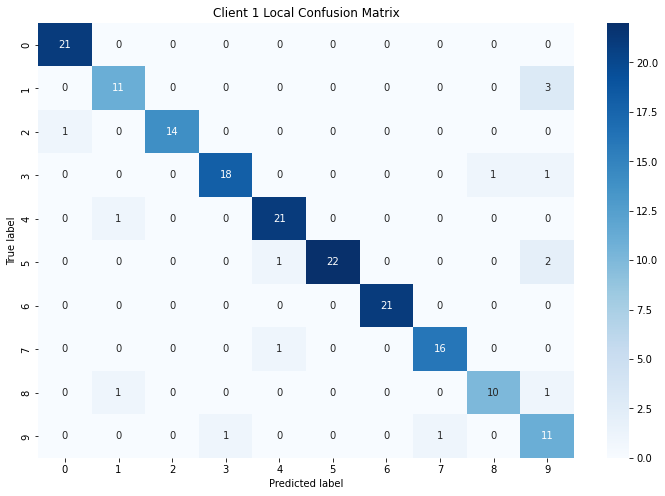

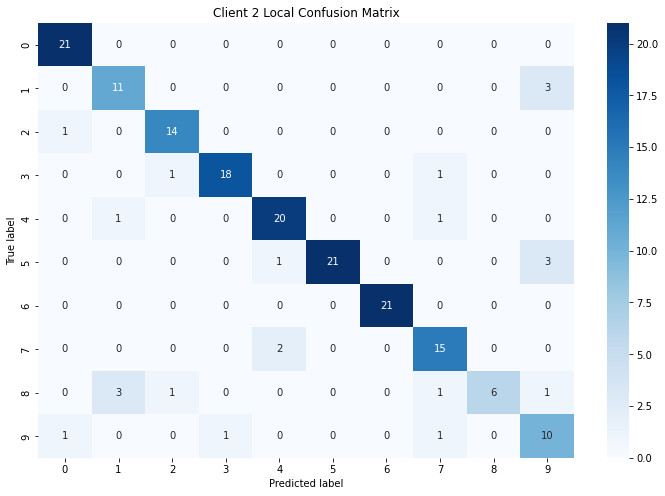

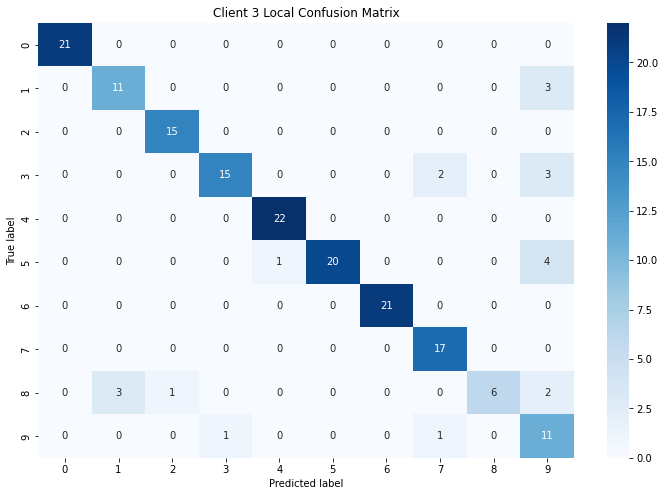

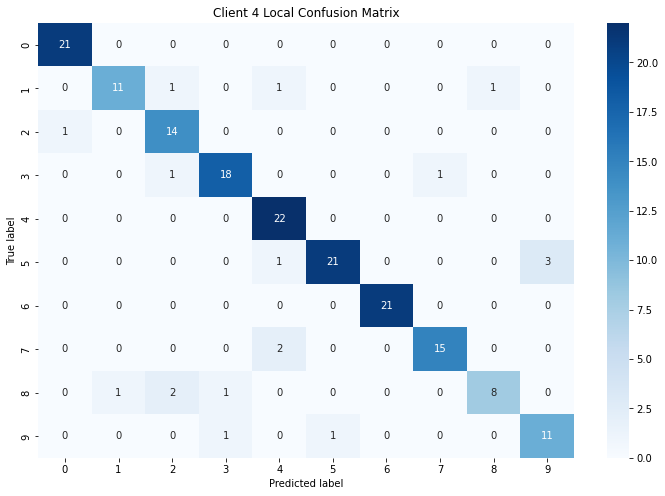

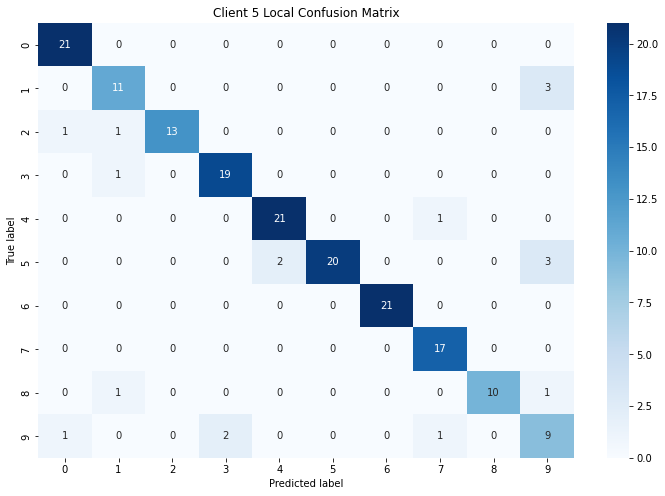

In [6]:
scenario_1.print_local_metrics(plot=True)


Metrics that each client gets on Test Set by training with Federated Learning Protocol:

|    | name     |   accuracy |     loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|---------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.916667 | 0.869939 |    0.924391 | 0.916667 |  0.99493  |
|  1 | Client 2 |   0.877778 | 0.853949 |    0.89136  | 0.877778 |  0.994362 |
|  2 | Client 3 |   0.911111 | 0.883097 |    0.932214 | 0.911111 |  0.993826 |
|  3 | Client 4 |   0.922222 | 0.865542 |    0.928457 | 0.922222 |  0.994946 |
|  4 | Client 5 |   0.905556 | 0.861208 |    0.914261 | 0.905556 |  0.994595 |


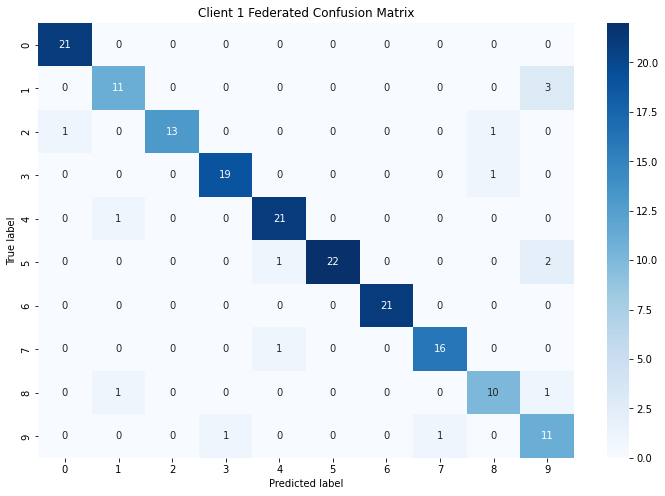

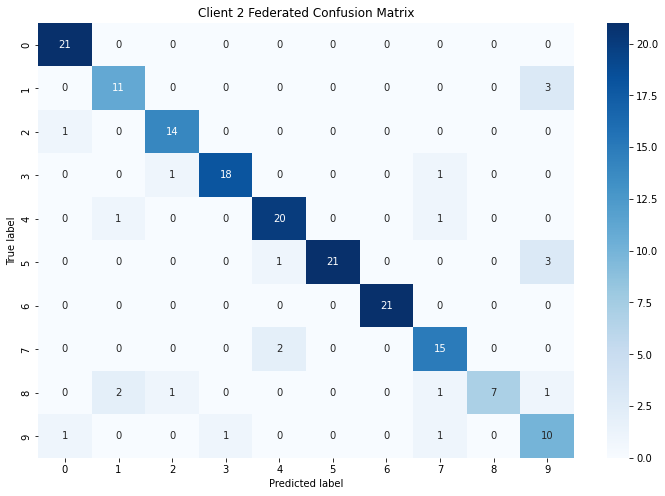

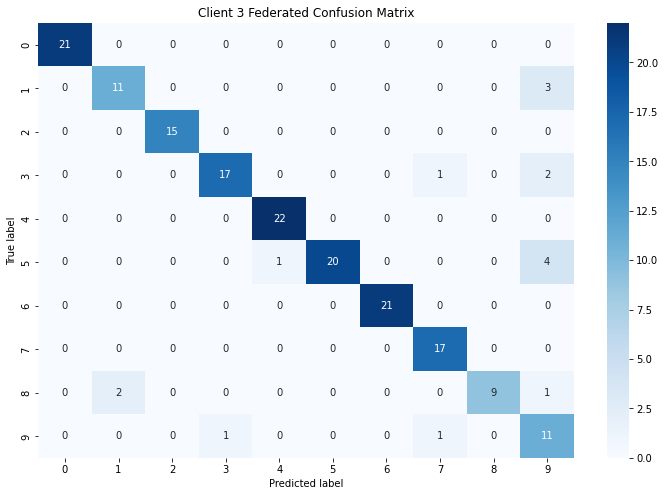

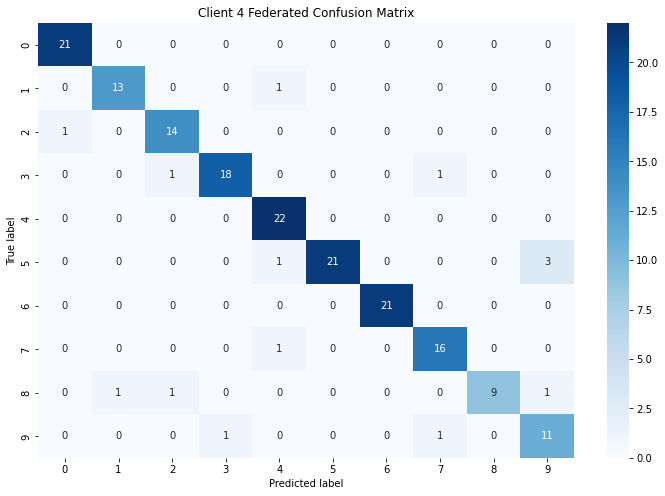

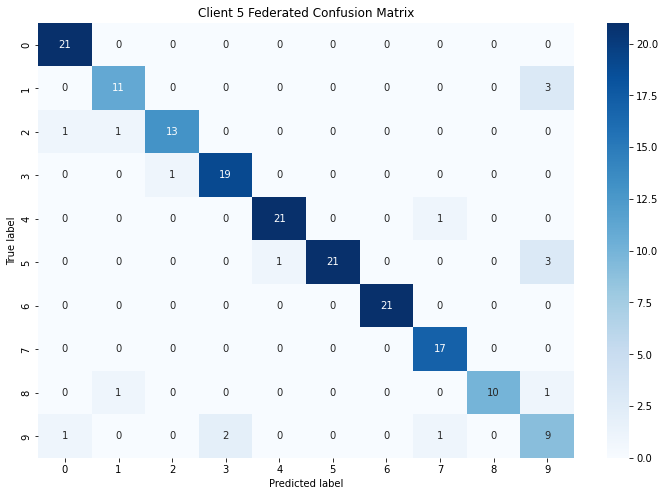

In [7]:
scenario_1.print_federated_metrics(plot=True)

### Scenario 2

This scenario uses a MLP Neural Network for classification with the following structure and information:
- 64 features.
- 10 classes.
- 1 hidden layer with 16 neurons and tanh as activation function.
- Weights and biases initializated with He initialization method.
- Softmax as output layer.

The protocol runs over 4 clients and the key length of homomorphic cryptosystem is 1024 bits.

The train is executed using 90% of data equally distributed over the 4 clients, with 0.01 as learning rate and 120 epochs.

The test is executed using the remaining 10% of data for all clients.

In [8]:
scenario_2 = pickle_load(SAVE_DIR, 'simulation_scenario_2.pkl')

In [9]:
print(scenario_2)
scenario_2.print_metadata()

Simulación para 4 clientes

        Layers size: (64, 16, 10)
        Activations: ('tanh', 'softmax')
        Trainable parameters: 1210
        


Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.516667 | 1.75114 |    0.503238 | 0.516667 |  0.86119  |
|  1 | Client 2 |   0.494444 | 1.70076 |    0.485757 | 0.494444 |  0.885155 |
|  2 | Client 3 |   0.655556 | 1.55343 |    0.674714 | 0.655556 |  0.935602 |
|  3 | Client 4 |   0.516667 | 1.6077  |    0.492679 | 0.516667 |  0.914554 |


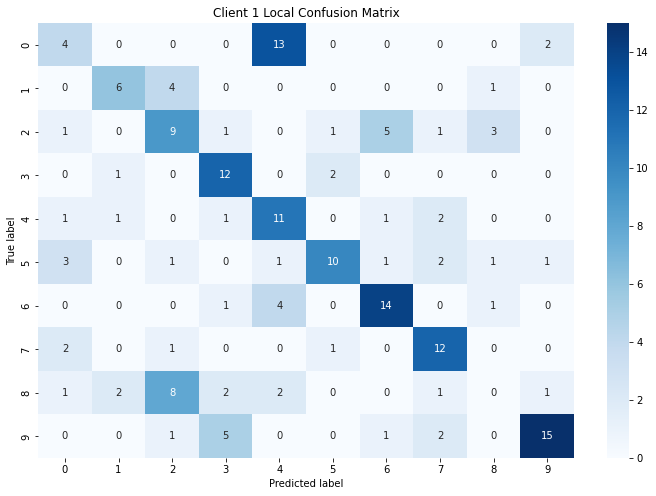

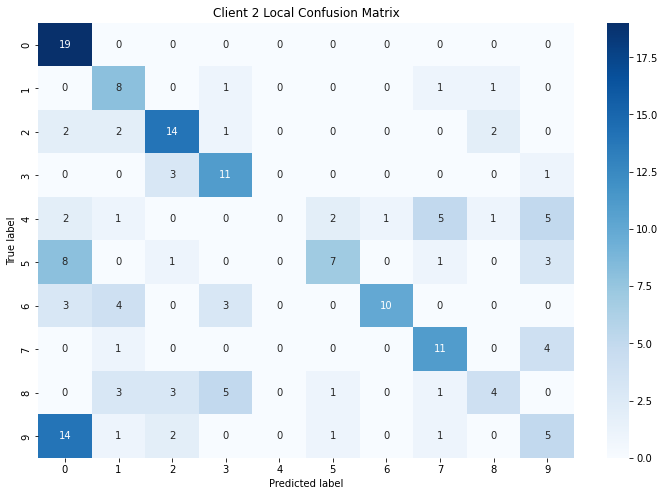

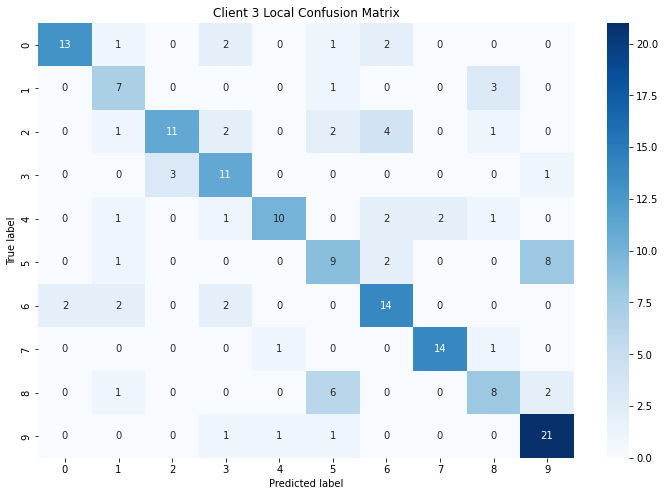

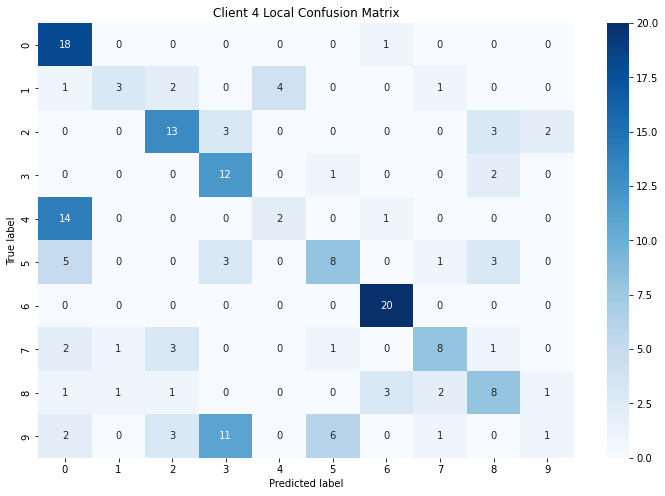

In [10]:
scenario_2.print_local_metrics(plot=True)


Metrics that each client gets on Test Set by training with Federated Learning Protocol:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.616667 | 1.62678 |    0.604753 | 0.616667 |  0.89628  |
|  1 | Client 2 |   0.505556 | 1.69871 |    0.499156 | 0.505556 |  0.884563 |
|  2 | Client 3 |   0.616667 | 1.55482 |    0.633297 | 0.616667 |  0.93282  |
|  3 | Client 4 |   0.588889 | 1.49307 |    0.536639 | 0.588889 |  0.935412 |


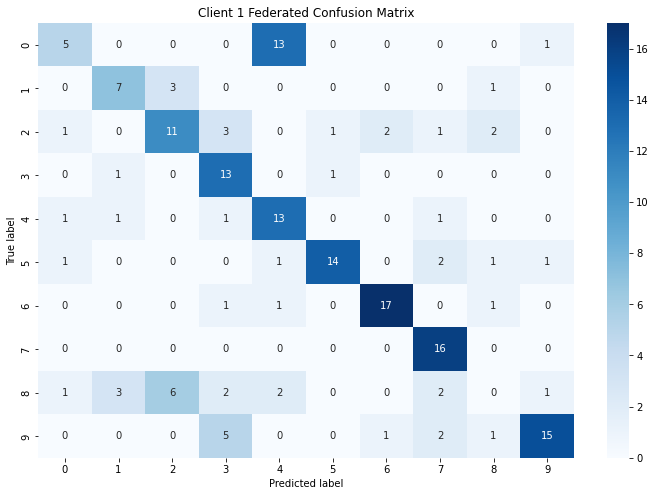

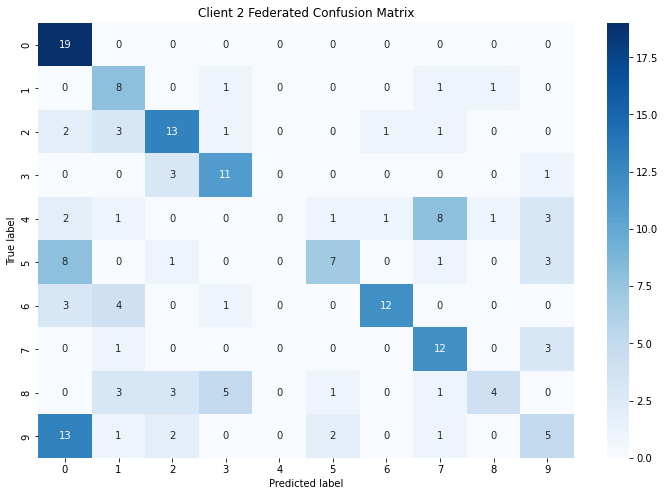

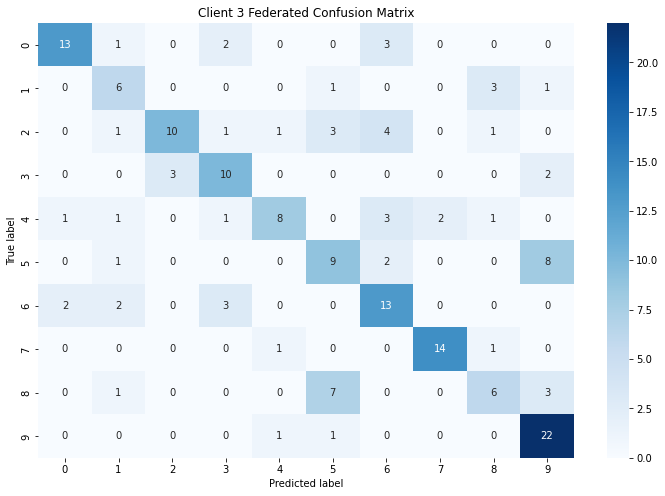

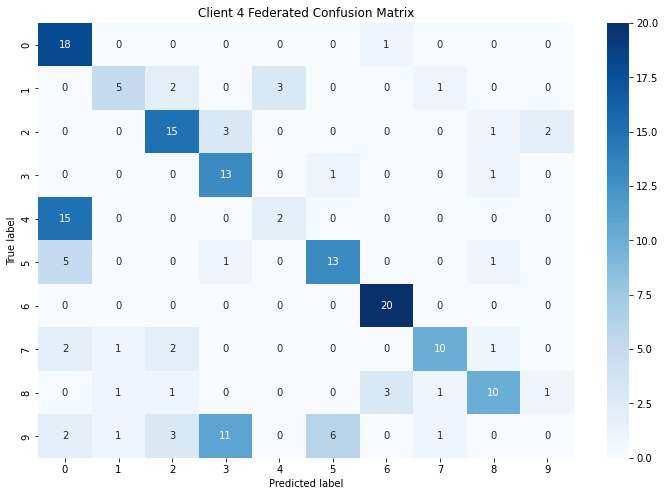

In [12]:
scenario_2.print_federated_metrics(plot=True)

### Scenario 3

This scenario uses a MLP Neural Network for classification with the following structure and information:
- 64 features.
- 10 classes.
- 2 hidden layers with 32 and 16 neurons respectively and tanh as activation function.
- Weights and biases initializated with He initialization method.
- Softmax as output layer.

The protocol runs over 3 clients and the key length of homomorphic cryptosystem is 1024 bits.

The train is executed using 90% of data equally distributed over the 3 clients, with 0.01 as learning rate and 120 epochs.

The test is executed using the remaining 10% of data for all clients.

In [13]:
scenario_3 = pickle_load(SAVE_DIR, 'simulation_scenario_3.pkl')

In [14]:
print(scenario_3)
scenario_3.print_metadata()

Simulación para 3 clientes

        Layers size: (64, 32, 16, 10)
        Activations: ('tanh', 'tanh', 'softmax')
        Trainable parameters: 2778
        


Metrics that each client gets on Test Set by training only on own local data:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.494444 | 1.65769 |    0.495888 | 0.494444 |  0.896748 |
|  1 | Client 2 |   0.588889 | 1.7016  |    0.650985 | 0.588889 |  0.886472 |
|  2 | Client 3 |   0.538889 | 1.70539 |    0.520901 | 0.538889 |  0.86582  |


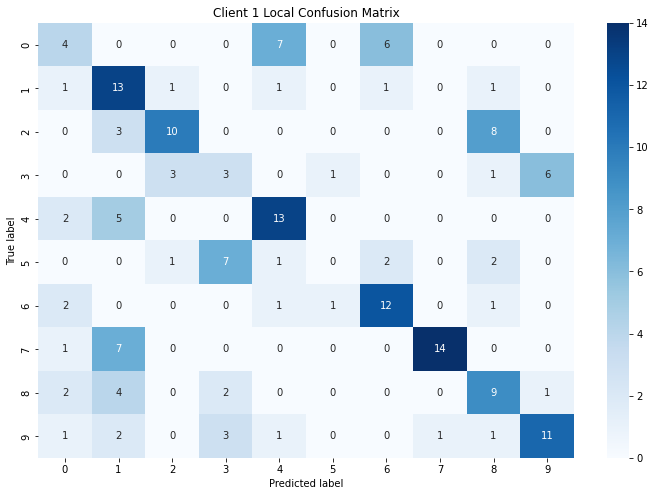

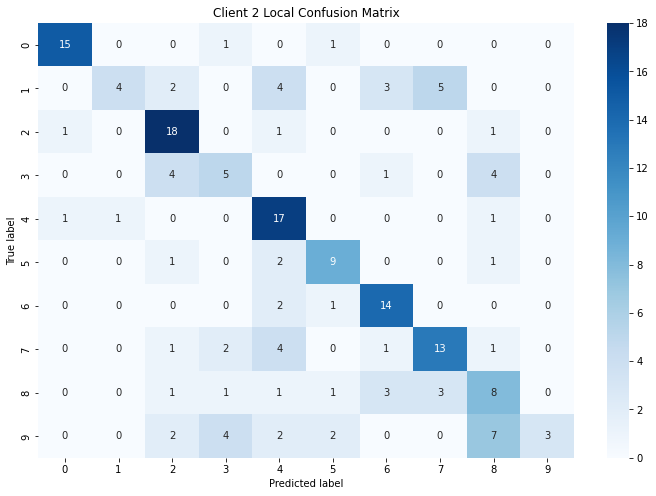

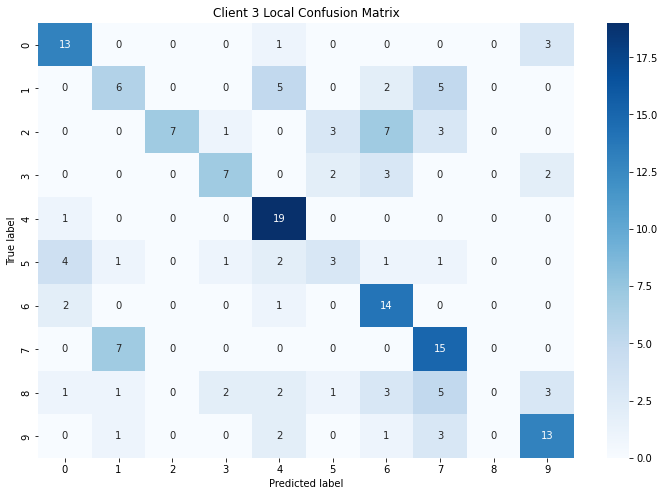

In [15]:
scenario_3.print_local_metrics(plot=True)


Metrics that each client gets on Test Set by training with Federated Learning Protocol:

|    | name     |   accuracy |    loss |   precision |   recall |   roc-auc |
|---:|:---------|-----------:|--------:|------------:|---------:|----------:|
|  0 | Client 1 |   0.588889 | 1.53589 |    0.634221 | 0.588889 |  0.91974  |
|  1 | Client 2 |   0.572222 | 1.72781 |    0.621535 | 0.572222 |  0.876926 |
|  2 | Client 3 |   0.588889 | 1.57979 |    0.560777 | 0.588889 |  0.892035 |


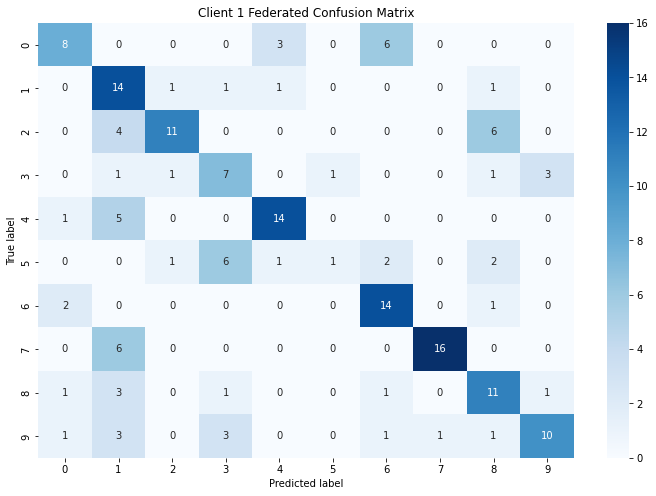

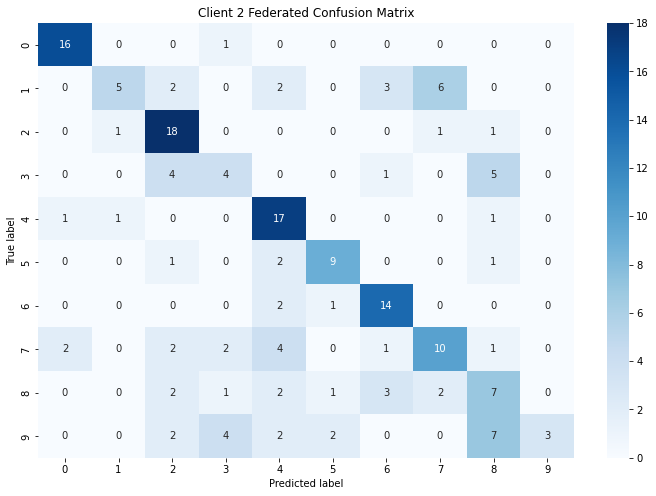

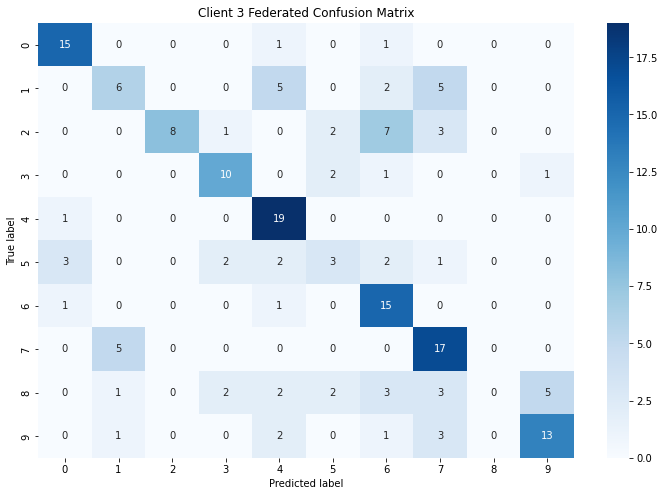

In [16]:
scenario_3.print_federated_metrics(plot=True)